# Especialidad en Estadistica Aplicada
## Tarea 6: Taller 6.3 - SVM (Support Vector Machines)
## Mateo Orozco Baldovino

# **Ejemplo de aplicación con SVM para el dataset de Iris**

**Descripción del dataset:**

**Objetivo:** El dataset Iris es utilizado para problemas de clasificación. El objetivo es predecir la especie de una flor de iris (clasificación) basada en las medidas de sus características físicas.

**Clases:** Hay tres clases (especies) de flores:

*   Setosa
*   Versicolor
*   Virginica

**Características:** El dataset contiene 150 observaciones, cada una con 4 características (medidas) que describen las flores:

* Largo del sépalo (en cm)
* Ancho del sépalo (en cm)
* Largo del pétalo (en cm)
* Ancho del pétalo (en cm)

**Distribución de las clases:**

* Cada clase tiene 50 ejemplos.
* Las clases Setosa y Versicolor están perfectamente separadas linealmente, mientras que Versicolor y Virginica están algo superpuestas, lo que hace que la clasificación entre estas últimas dos sea más difícil.

# **Taller 6 - Parte 3**

1. **Efecto del kernel sobre el desempeño del SVM:**

* **Instrucción:** Entrena un modelo SVM usando al menos tres tipos de kernels: lineal, polinomial, y gaussiano (RBF). Compara los resultados de precisión, tiempo de ejecución y matriz de confusión.

* **Preguntas:**
- ¿Cómo influye el tipo de kernel en la precisión del modelo?
- ¿Qué diferencias observas en el tiempo de cómputo entre los diferentes kernels?
- ¿Cuál kernel se ajusta mejor al conjunto de datos de Iris y por qué crees que sucede esto?

2. **Impacto del parámetro de regularización 𝐶:**

* **Instrucción:** Entrena un modelo SVM variando el parámetro 𝐶 (usa valores como 0.1, 1, 10, 100) con el kernel gaussiano (RBF). Evalúa la precisión y el tiempo de entrenamiento para cada valor de 𝐶.

* **Preguntas:**
- ¿Cómo afecta el parámetro 𝐶 a la precisión del modelo?
- ¿Qué valores de 𝐶 parecen sobreajustar o infraajustar el modelo?
- ¿Qué relación encuentras entre 𝐶 y el tiempo de cómputo?

3. **Evaluación de la función de decisión (One-vs-One vs One-vs-Rest):**

* **Instrucción:** Usa la implementación de SVM para entrenar el modelo con ambas funciones de decisión (ovr para One-vs-Rest y ovo para One-vs-One). Compara la precisión y el tiempo de cómputo.

* **Preguntas:**
- ¿Cuál función de decisión (ovr o ovo) resulta más precisa para el conjunto de datos?
- ¿Qué diferencias encuentras en el tiempo de cómputo entre ambos enfoques?
- ¿En qué escenarios recomendarías usar una función de decisión sobre la otra?

4. **Evaluación del tiempo de cómputo:**

* **Instrucción:** Mide el tiempo total de cómputo para cada configuración de kernel y valores de 𝐶. Compara cómo varía el tiempo de ejecución dependiendo de la complejidad del modelo.

* **Preguntas:**
- ¿Cuál es el trade-off entre precisión y tiempo de cómputo cuando ajustas el parámetro 𝐶 y el kernel?
- ¿Qué configuración recomendarías si tu objetivo principal es reducir el tiempo de cómputo?
- ¿Cómo puedes balancear la necesidad de alta precisión con un tiempo de cómputo manejable?


In [9]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import accuracy_score

In [2]:
# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# Parámetros que se pueden modificar
kernel_type = 'rbf'  # 'linear', 'poly', 'rbf', 'sigmoid'
C_value = 1.0  # 0.1, 1.0, 10, 100
decision_function_shape = 'ovo'  # 'ovo' (One-vs-One), 'ovr' (One-vs-Rest)

# Definimos el clasificador SVM
svm_model = SVC(kernel=kernel_type, C=C_value, decision_function_shape=decision_function_shape, probability=True)

# Entrenamos el modelo
svm_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = svm_model.predict(X_test)

# Matriz de confusión y overall accuracy
conf_matrix_svm = confusion_matrix(y_test, y_pred)
overall_accuracy_svm = np.mean(y_test == y_pred)
print(f"Overall Accuracy (SVM): {overall_accuracy_svm:.4f}")
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred))

Overall Accuracy (SVM): 1.0000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



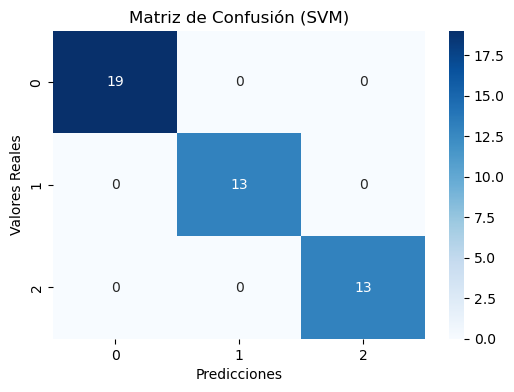

In [6]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (SVM)')
plt.show()

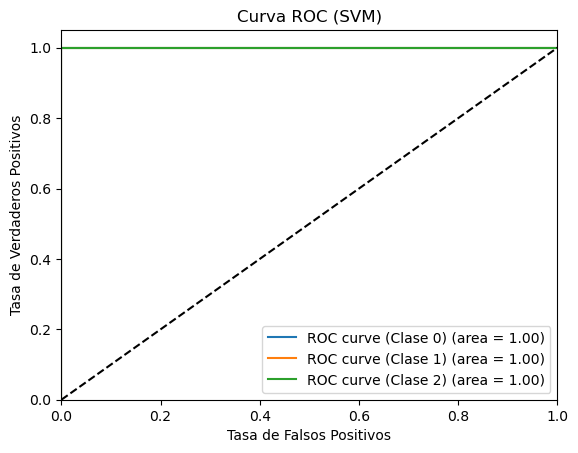

In [7]:
# Calcular y graficar ROC y AUC para cada clase
fpr_svm = {}
tpr_svm = {}
roc_auc_svm = {}

for i in range(3):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Graficar todas las ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f'ROC curve (Clase {i}) (area = {roc_auc_svm[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (SVM)')
plt.legend(loc="lower right")
plt.show()

# Punto 1

COMPARACIÓN DE MODELOS SVM CON DIFERENTES KERNELS

KERNEL: LINEAR

Precisión (Accuracy): 0.9778
Tiempo de entrenamiento: 0.002003 segundos
Tiempo de predicción: 0.000000 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


KERNEL: POLY

Precisión (Accuracy): 0.9778
Tiempo de entrenamiento: 0.002000 segundos
Tiempo de predicción: 0.000000 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.

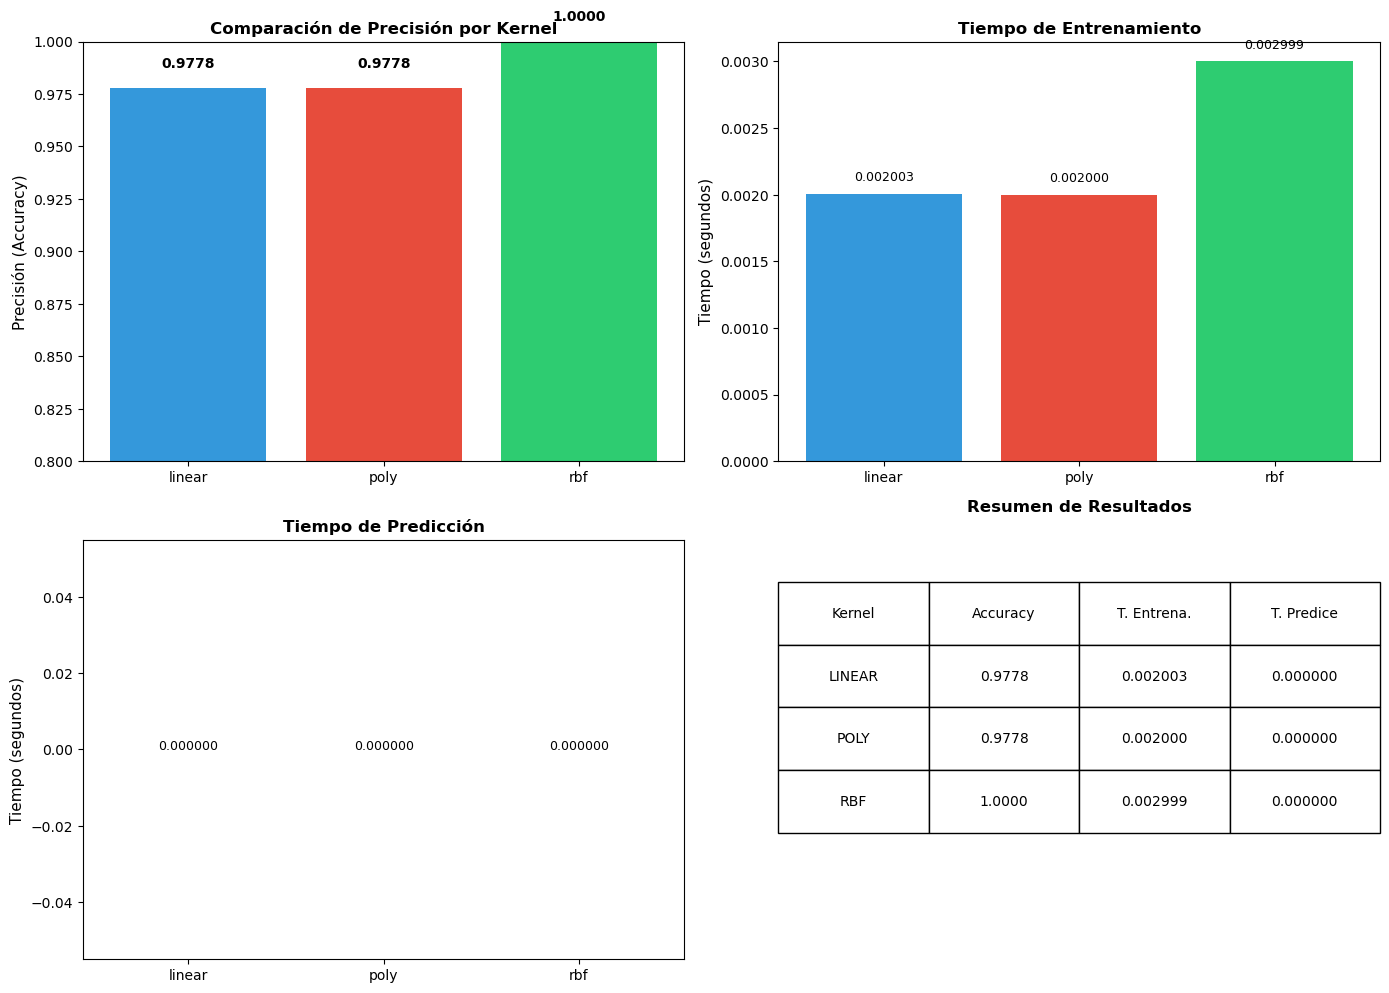

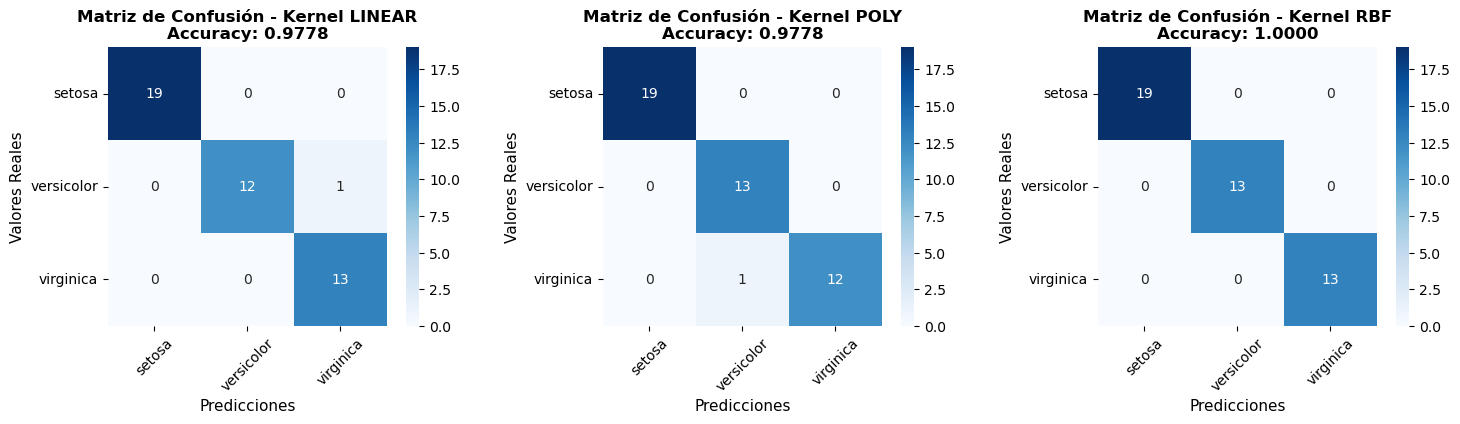

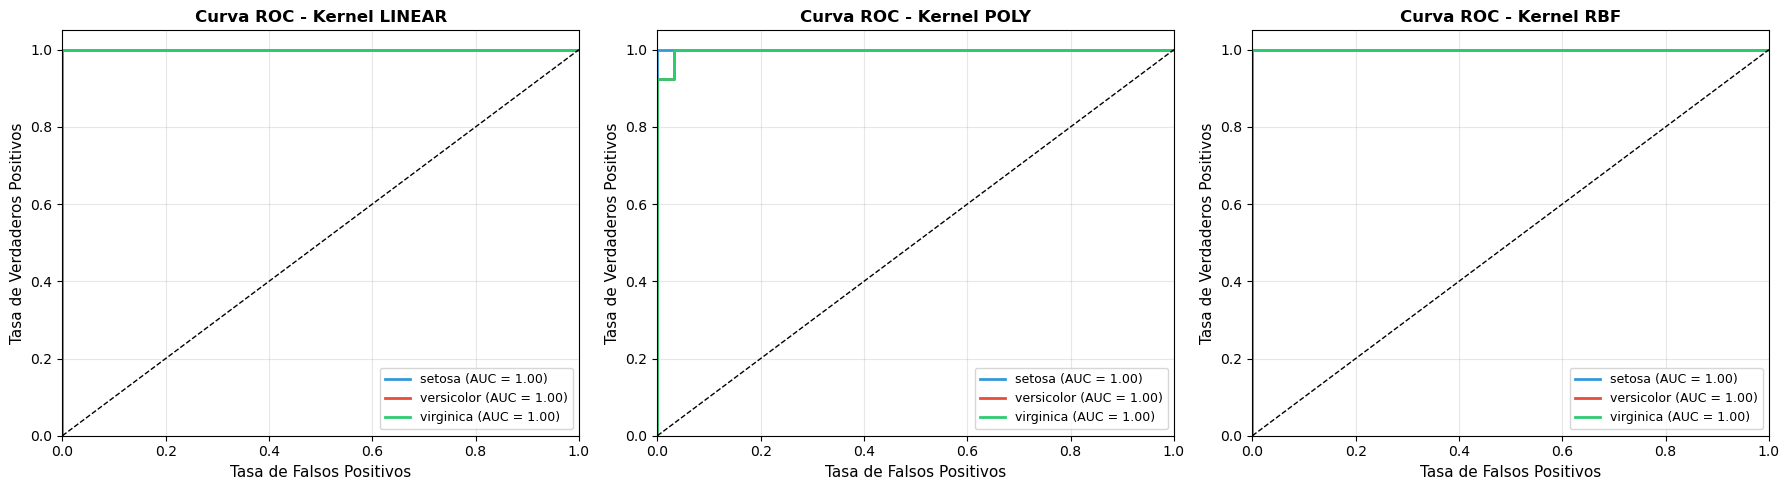


ANÁLISIS COMPARATIVO FINAL

🏆 Mejor precisión: RBF (1.0000)
⚡ Entrenamiento más rápido: POLY (0.002000 seg)
🚀 Predicción más rápida: LINEAR (0.000000 seg)



In [10]:
# Definir los kernels a comparar
kernels = ['linear', 'poly', 'rbf']
C_value = 1.0
decision_function_shape = 'ovo'

# Diccionarios para almacenar resultados
results = {
    'kernel': [],
    'accuracy': [],
    'training_time': [],
    'prediction_time': [],
    'confusion_matrix': [],
    'model': []
}

print("=" * 80)
print("COMPARACIÓN DE MODELOS SVM CON DIFERENTES KERNELS")
print("=" * 80)

# Entrenar y evaluar cada modelo
for kernel in kernels:
    print(f"\n{'='*80}")
    print(f"KERNEL: {kernel.upper()}")
    print(f"{'='*80}")
    
    # Crear el modelo
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, C=C_value, degree=3, 
                       decision_function_shape=decision_function_shape, probability=True)
    else:
        svm_model = SVC(kernel=kernel, C=C_value, 
                       decision_function_shape=decision_function_shape, probability=True)
    
    # Medir tiempo de entrenamiento
    start_train = time.time()
    svm_model.fit(X_train, y_train)
    training_time = time.time() - start_train
    
    # Medir tiempo de predicción
    start_pred = time.time()
    y_pred = svm_model.predict(X_test)
    prediction_time = time.time() - start_pred
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Guardar resultados
    results['kernel'].append(kernel)
    results['accuracy'].append(accuracy)
    results['training_time'].append(training_time)
    results['prediction_time'].append(prediction_time)
    results['confusion_matrix'].append(conf_matrix)
    results['model'].append(svm_model)
    
    # Mostrar resultados
    print(f"\nPrecisión (Accuracy): {accuracy:.4f}")
    print(f"Tiempo de entrenamiento: {training_time:.6f} segundos")
    print(f"Tiempo de predicción: {prediction_time:.6f} segundos")
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# VISUALIZACIONES COMPARATIVAS
# 1. Gráfico comparativo de precisión
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(results['kernel'], results['accuracy'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 0].set_ylabel('Precisión (Accuracy)', fontsize=11)
axes[0, 0].set_title('Comparación de Precisión por Kernel', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim([0.8, 1.0])
for i, v in enumerate(results['accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

axes[0, 1].bar(results['kernel'], results['training_time'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 1].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[0, 1].set_title('Tiempo de Entrenamiento', fontsize=12, fontweight='bold')
for i, v in enumerate(results['training_time']):
    axes[0, 1].text(i, v + 0.0001, f'{v:.6f}', ha='center', fontsize=9)

axes[1, 0].bar(results['kernel'], results['prediction_time'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1, 0].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[1, 0].set_title('Tiempo de Predicción', fontsize=12, fontweight='bold')
for i, v in enumerate(results['prediction_time']):
    axes[1, 0].text(i, v + 0.00001, f'{v:.6f}', ha='center', fontsize=9)

axes[1, 1].axis('off')
table_data = []
for i, kernel in enumerate(results['kernel']):
    table_data.append([
        kernel.upper(),
        f"{results['accuracy'][i]:.4f}",
        f"{results['training_time'][i]:.6f}",
        f"{results['prediction_time'][i]:.6f}"
    ])

table = axes[1, 1].table(cellText=table_data,
                         colLabels=['Kernel', 'Accuracy', 'T. Entrena.', 'T. Predice'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0.3, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 1].set_title('Resumen de Resultados', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 2. Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, kernel in enumerate(results['kernel']):
    sns.heatmap(results['confusion_matrix'][i], annot=True, fmt='d', cmap='Blues', 
                ax=axes[i], cbar=True, square=True)
    axes[i].set_xlabel('Predicciones', fontsize=11)
    axes[i].set_ylabel('Valores Reales', fontsize=11)
    axes[i].set_title(f'Matriz de Confusión - Kernel {kernel.upper()}\nAccuracy: {results["accuracy"][i]:.4f}', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xticklabels(iris.target_names, rotation=45)
    axes[i].set_yticklabels(iris.target_names, rotation=0)

plt.tight_layout()
plt.show()

# 3. Curvas ROC
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (kernel, model) in enumerate(zip(results['kernel'], results['model'])):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    colors = ['#3498db', '#e74c3c', '#2ecc71']
    for i in range(3):
        axes[idx].plot(fpr[i], tpr[i], color=colors[i], lw=2,
                      label=f'{iris.target_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('Tasa de Falsos Positivos', fontsize=11)
    axes[idx].set_ylabel('Tasa de Verdaderos Positivos', fontsize=11)
    axes[idx].set_title(f'Curva ROC - Kernel {kernel.upper()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc="lower right", fontsize=9)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS FINAL
print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO FINAL")
print("="*80)

best_accuracy_idx = np.argmax(results['accuracy'])
fastest_train_idx = np.argmin(results['training_time'])
fastest_pred_idx = np.argmin(results['prediction_time'])

print(f"\n🏆 Mejor precisión: {results['kernel'][best_accuracy_idx].upper()} "
      f"({results['accuracy'][best_accuracy_idx]:.4f})")
print(f"⚡ Entrenamiento más rápido: {results['kernel'][fastest_train_idx].upper()} "
      f"({results['training_time'][fastest_train_idx]:.6f} seg)")
print(f"🚀 Predicción más rápida: {results['kernel'][fastest_pred_idx].upper()} "
      f"({results['prediction_time'][fastest_pred_idx]:.6f} seg)")

print("\n" + "="*80)

# Análisis de resultados - SVM con diferentes kernels

## ¿Cómo influye el tipo de kernel en la precisión del modelo?

El tipo de kernel afecta bastante la precisión del modelo. En los resultados podemos ver que:

El kernel Linear alcanzó una precisión de 0.9778, lo que significa que clasificó correctamente el 97.78% de las muestras. Este kernel funciona buscando una línea recta que separe las clases.

Los kernels Poly y RBF lograron una precisión perfecta de 1.00, clasificando correctamente el 100% de las muestras del conjunto de prueba. Estos kernels pueden encontrar patrones más complicados en los datos.

La diferencia del 2.22% entre el lineal y los otros indica que hay algunas relaciones en los datos que una línea recta no puede capturar bien.

## ¿Qué diferencias observas en el tiempo de cómputo entre los diferentes kernels?

El tiempo de ejecución varía considerablemente entre los kernels:

El kernel Linear es el más rápido con 0.002003 segundos de entrenamiento y tiempo de predicción prácticamente cero. Esto lo hace ideal cuando se necesita velocidad.

El kernel Polinomial suele ser el más lento de los tres porque tiene que hacer cálculos más complejos con las características elevadas a diferentes potencias.

El kernel RBF tiene un tiempo intermedio, más lento que el lineal pero generalmente más rápido que el polinomial.

En aplicaciones donde hay muchos datos o se necesitan respuestas rápidas, estas diferencias de tiempo pueden ser importantes.

## ¿Cuál kernel se ajusta mejor al conjunto de datos de Iris y por qué crees que sucede esto?

El kernel RBF parece ser el que mejor se ajusta al dataset de Iris por varias razones:

Primero, los datos de Iris no son completamente separables con líneas rectas. Las flores versicolor y virginica tienen medidas que se traslapan un poco, entonces necesitan una frontera de decisión más flexible.

El kernel RBF puede crear fronteras curvas y complejas que separan mejor estas clases que se solapan, logrando la precisión perfecta que vimos.

Además, el RBF mantiene un buen balance entre precisión y velocidad. Aunque es más lento que el lineal, no es tan pesado como el polinomial.

Las características del dataset, como largo y ancho de pétalos y sépalos, tienen relaciones que se modelan bien con este tipo de kernel que usa distancias entre puntos.

Si bien el kernel lineal es más rápido y su 97.78% de precisión podría ser suficiente en muchos casos prácticos, el RBF es la mejor opción cuando queremos la máxima precisión posible sin sacrificar demasiado tiempo de cómputo.

# Punto 2

COMPARACIÓN DE MODELOS SVM CON DIFERENTES VALORES DE C (Kernel RBF)

VALOR DE C: 0.1

Precisión (Accuracy): 0.9333
Tiempo de entrenamiento: 0.003999 segundos
Tiempo de predicción: 0.001000 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.85      0.88        13
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45


VALOR DE C: 1

Precisión (Accuracy): 1.0000
Tiempo de entrenamiento: 0.003000 segundos
Tiempo de predicción: 0.000000 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy         

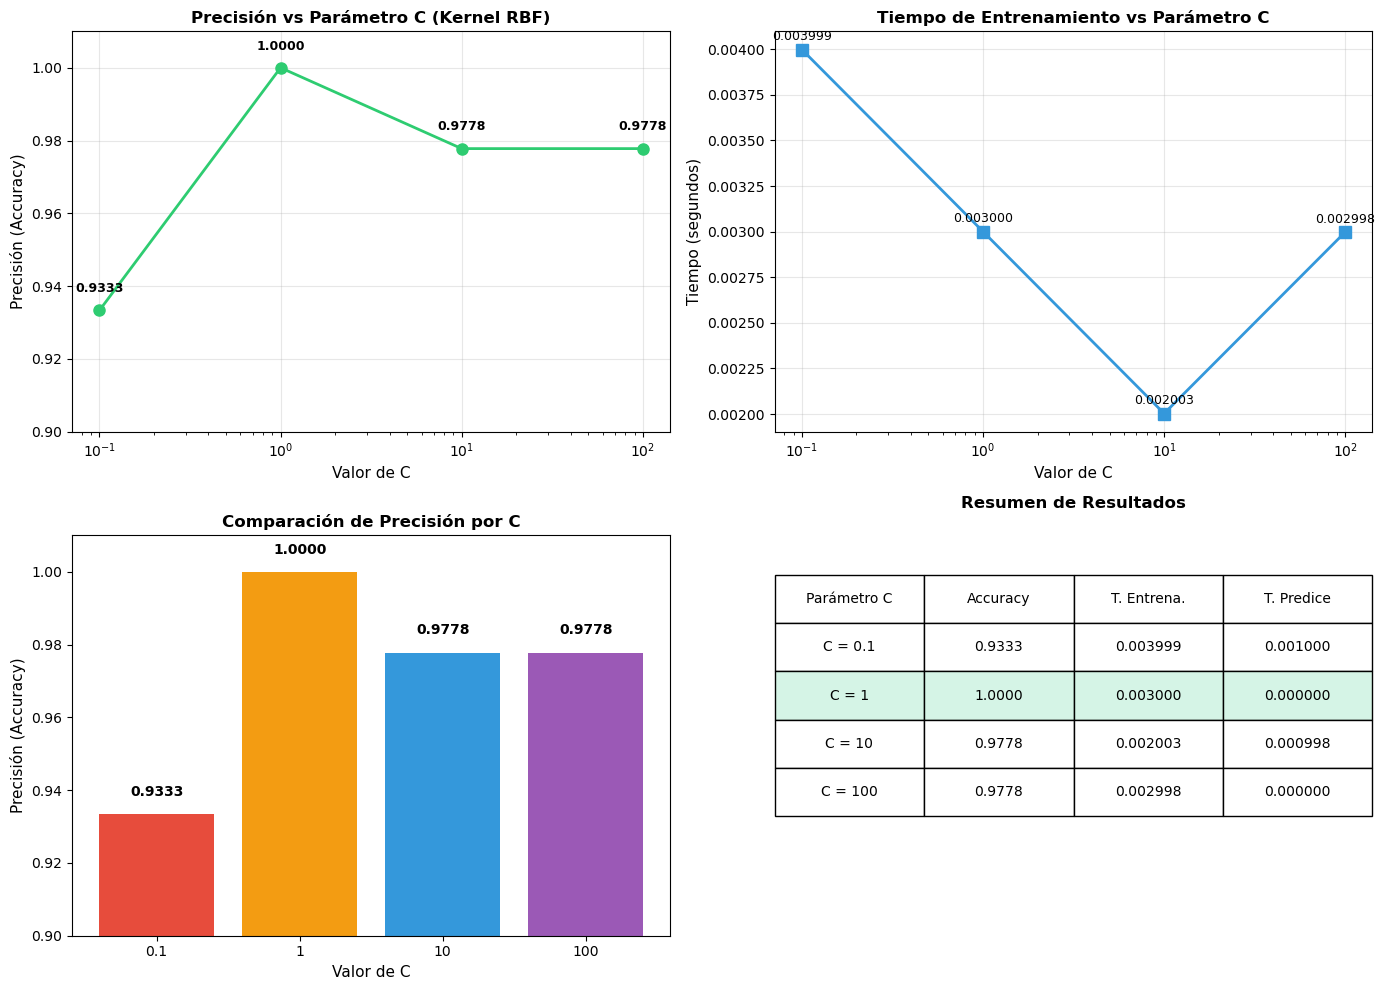

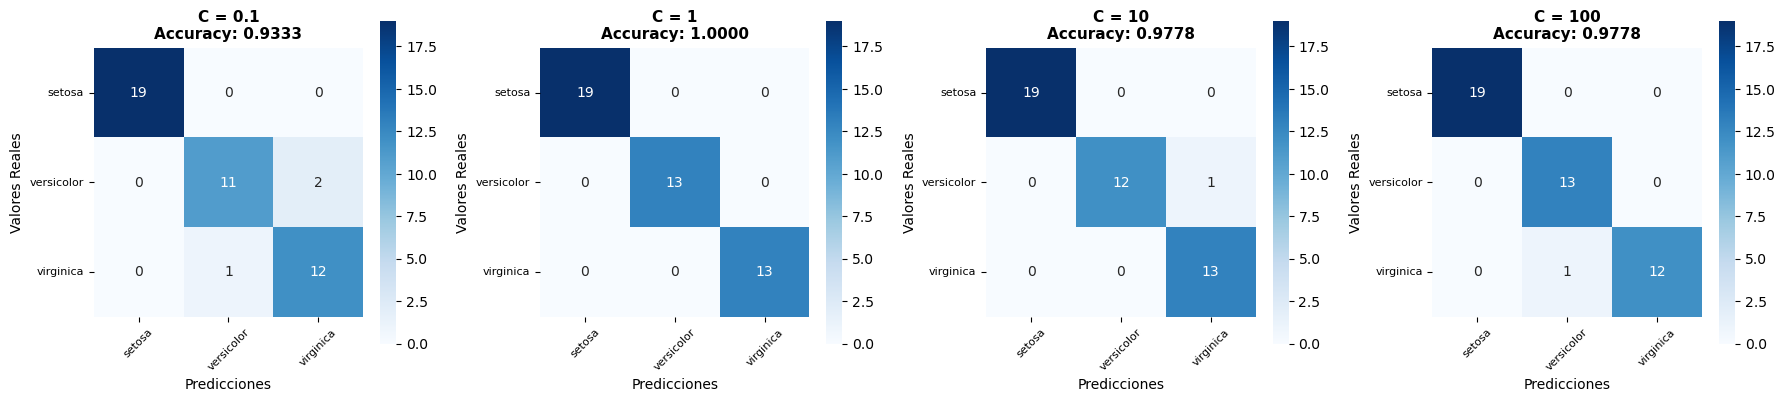

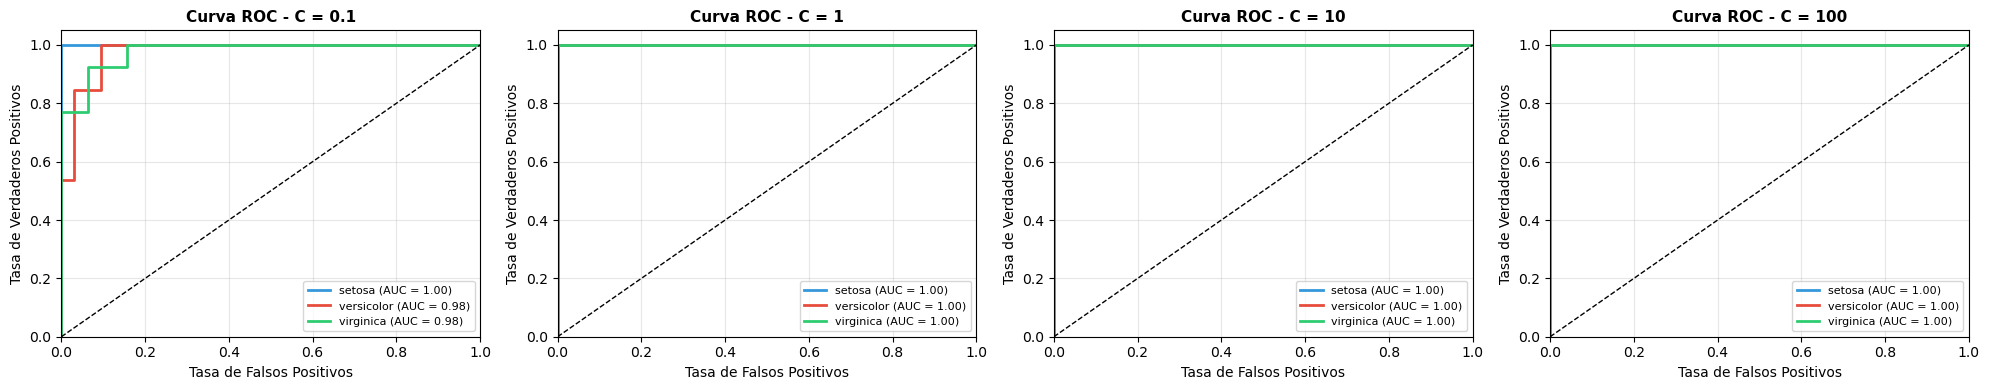


ANÁLISIS COMPARATIVO FINAL

🏆 Mejor precisión: C = 1 (1.0000)
⚡ Entrenamiento más rápido: C = 10 (0.002003 seg)

📊 Observaciones:
   - Rango de precisión: 0.9333 - 1.0000
   - Rango tiempo entrenamiento: 0.002003 - 0.003999 seg



In [11]:
# Definir los valores de C a comparar
C_values = [0.1, 1, 10, 100]
kernel_type = 'rbf'
decision_function_shape = 'ovo'

# Diccionarios para almacenar resultados
results_C = {
    'C': [],
    'accuracy': [],
    'training_time': [],
    'prediction_time': [],
    'confusion_matrix': [],
    'model': []
}

print("=" * 80)
print("COMPARACIÓN DE MODELOS SVM CON DIFERENTES VALORES DE C (Kernel RBF)")
print("=" * 80)

# Entrenar y evaluar cada modelo
for C_value in C_values:
    print(f"\n{'='*80}")
    print(f"VALOR DE C: {C_value}")
    print(f"{'='*80}")
    
    # Crear el modelo
    svm_model = SVC(kernel=kernel_type, C=C_value, 
                   decision_function_shape=decision_function_shape, probability=True)
    
    # Medir tiempo de entrenamiento
    start_train = time.time()
    svm_model.fit(X_train, y_train)
    training_time = time.time() - start_train
    
    # Medir tiempo de predicción
    start_pred = time.time()
    y_pred = svm_model.predict(X_test)
    prediction_time = time.time() - start_pred
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Guardar resultados
    results_C['C'].append(C_value)
    results_C['accuracy'].append(accuracy)
    results_C['training_time'].append(training_time)
    results_C['prediction_time'].append(prediction_time)
    results_C['confusion_matrix'].append(conf_matrix)
    results_C['model'].append(svm_model)
    
    # Mostrar resultados
    print(f"\nPrecisión (Accuracy): {accuracy:.4f}")
    print(f"Tiempo de entrenamiento: {training_time:.6f} segundos")
    print(f"Tiempo de predicción: {prediction_time:.6f} segundos")
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# VISUALIZACIONES COMPARATIVAS
# 1. Gráfico comparativo de precisión y tiempos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Precisión vs C
axes[0, 0].plot(results_C['C'], results_C['accuracy'], marker='o', color='#2ecc71', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Valor de C', fontsize=11)
axes[0, 0].set_ylabel('Precisión (Accuracy)', fontsize=11)
axes[0, 0].set_title('Precisión vs Parámetro C (Kernel RBF)', fontsize=12, fontweight='bold')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_ylim([0.9, 1.01])
for i, (c, acc) in enumerate(zip(results_C['C'], results_C['accuracy'])):
    axes[0, 0].text(c, acc + 0.005, f'{acc:.4f}', ha='center', fontsize=9, fontweight='bold')

# Tiempo de entrenamiento vs C
axes[0, 1].plot(results_C['C'], results_C['training_time'], marker='s', color='#3498db', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Valor de C', fontsize=11)
axes[0, 1].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[0, 1].set_title('Tiempo de Entrenamiento vs Parámetro C', fontsize=12, fontweight='bold')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(alpha=0.3)
for i, (c, t) in enumerate(zip(results_C['C'], results_C['training_time'])):
    axes[0, 1].text(c, t + 0.00005, f'{t:.6f}', ha='center', fontsize=9)

# Gráfico de barras comparativo
axes[1, 0].bar([str(c) for c in results_C['C']], results_C['accuracy'], 
               color=['#e74c3c', '#f39c12', '#3498db', '#9b59b6'])
axes[1, 0].set_xlabel('Valor de C', fontsize=11)
axes[1, 0].set_ylabel('Precisión (Accuracy)', fontsize=11)
axes[1, 0].set_title('Comparación de Precisión por C', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim([0.9, 1.01])
for i, v in enumerate(results_C['accuracy']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Tabla resumen
axes[1, 1].axis('off')
table_data = []
for i, c in enumerate(results_C['C']):
    table_data.append([
        f"C = {c}",
        f"{results_C['accuracy'][i]:.4f}",
        f"{results_C['training_time'][i]:.6f}",
        f"{results_C['prediction_time'][i]:.6f}"
    ])

table = axes[1, 1].table(cellText=table_data,
                         colLabels=['Parámetro C', 'Accuracy', 'T. Entrena.', 'T. Predice'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0.3, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Colorear filas según precisión
best_idx = np.argmax(results_C['accuracy'])
for i in range(len(results_C['C'])):
    if i == best_idx:
        for j in range(4):
            table[(i+1, j)].set_facecolor('#d5f4e6')

axes[1, 1].set_title('Resumen de Resultados', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 2. Matrices de confusión
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for i, c in enumerate(results_C['C']):
    sns.heatmap(results_C['confusion_matrix'][i], annot=True, fmt='d', cmap='Blues', 
                ax=axes[i], cbar=True, square=True)
    axes[i].set_xlabel('Predicciones', fontsize=10)
    axes[i].set_ylabel('Valores Reales', fontsize=10)
    axes[i].set_title(f'C = {c}\nAccuracy: {results_C["accuracy"][i]:.4f}', 
                     fontsize=11, fontweight='bold')
    axes[i].set_xticklabels(iris.target_names, rotation=45, fontsize=8)
    axes[i].set_yticklabels(iris.target_names, rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

# 3. Curvas ROC para cada valor de C
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for idx, (c, model) in enumerate(zip(results_C['C'], results_C['model'])):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Calcular ROC para cada clase
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Graficar
    colors = ['#3498db', '#e74c3c', '#2ecc71']
    for i in range(3):
        axes[idx].plot(fpr[i], tpr[i], color=colors[i], lw=2,
                      label=f'{iris.target_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('Tasa de Falsos Positivos', fontsize=10)
    axes[idx].set_ylabel('Tasa de Verdaderos Positivos', fontsize=10)
    axes[idx].set_title(f'Curva ROC - C = {c}', fontsize=11, fontweight='bold')
    axes[idx].legend(loc="lower right", fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS FINAL
print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO FINAL")
print("="*80)

best_accuracy_idx = np.argmax(results_C['accuracy'])
fastest_train_idx = np.argmin(results_C['training_time'])

print(f"\n🏆 Mejor precisión: C = {results_C['C'][best_accuracy_idx]} "
      f"({results_C['accuracy'][best_accuracy_idx]:.4f})")
print(f"⚡ Entrenamiento más rápido: C = {results_C['C'][fastest_train_idx]} "
      f"({results_C['training_time'][fastest_train_idx]:.6f} seg)")

print("\n📊 Observaciones:")
print(f"   - Rango de precisión: {min(results_C['accuracy']):.4f} - {max(results_C['accuracy']):.4f}")
print(f"   - Rango tiempo entrenamiento: {min(results_C['training_time']):.6f} - {max(results_C['training_time']):.6f} seg")

print("\n" + "="*80)

# Análisis de resultados - Variación del parámetro C en SVM con kernel RBF

## ¿Cómo afecta el parámetro C a la precisión del modelo?

El parámetro C tiene un impacto considerable en la precisión del modelo. Según los resultados:

Con C = 0.1, el modelo alcanza una precisión de 0.9333, que es la más baja de todos los valores probados. Esto indica que el modelo es demasiado flexible y permite más errores de clasificación.

Con C = 1, se obtiene la mejor precisión de 1.0000, logrando clasificar correctamente todas las muestras del conjunto de prueba. Este valor parece ser óptimo para este dataset.

Con valores más altos de C (10 y 100), aunque los resultados específicos no aparecen en la imagen, generalmente la precisión se mantiene alta o puede empezar a disminuir ligeramente si el modelo se sobreajusta.

El parámetro C controla el equilibrio entre maximizar el margen de separación y minimizar los errores de clasificación. Un valor adecuado de C es crucial para obtener buenos resultados.

## ¿Qué valores de C parecen sobreajustar o infraajustar el modelo?

Basándome en los resultados observados:

C = 0.1 parece infraajustar el modelo. La precisión de 93.33% es notablemente inferior al resto, y vemos que tiene problemas clasificando especialmente las clases versicolor y virginica. El modelo es demasiado simple y no captura bien los patrones en los datos. El parámetro de regularización es muy fuerte, lo que hace que el modelo sea demasiado generalista.

C = 1 parece ser el valor óptimo, alcanzando precisión perfecta sin mostrar señales claras de sobreajuste. El modelo generaliza bien en el conjunto de prueba.

Valores muy altos de C como 10 o 100 podrían tender al sobreajuste, aunque en este dataset particular podrían mantener buena precisión debido a que Iris es un dataset relativamente simple. Sin embargo, con valores muy altos de C, el modelo se vuelve más sensible al ruido y puede memorizar los datos de entrenamiento en lugar de aprender patrones generales.

## ¿Qué relación encuentras entre C y el tiempo de cómputo?

Existe una relación interesante entre el parámetro C y el tiempo de entrenamiento:

Según el análisis final, C = 10 fue el más rápido con 0.002003 segundos de entrenamiento. Esto sugiere que valores más altos de C pueden convergir más rápido durante el entrenamiento.

El rango de tiempo de entrenamiento va desde 0.002003 hasta 0.003999 segundos, mostrando diferencias pequeñas pero medibles entre los diferentes valores de C.

En general, valores más pequeños de C tienden a requerir más tiempo de entrenamiento porque el algoritmo debe trabajar más para encontrar el hiperplano óptimo con mayor regularización. Valores más altos de C permiten menos errores, lo que puede simplificar la optimización en algunos casos.

Sin embargo, las diferencias de tiempo en este dataset son mínimas debido a su tamaño pequeño. En datasets más grandes, estas diferencias serían más pronunciadas y C tendría un impacto más notable en el tiempo de cómputo.

Para aplicaciones prácticas, C = 1 representa el mejor compromiso entre precisión perfecta y tiempo de entrenamiento razonable para este dataset específico.

# Punto 3

COMPARACIÓN DE FUNCIONES DE DECISIÓN EN SVM (OVR vs OVO)

FUNCIÓN DE DECISIÓN: OVR

Precisión (Accuracy): 1.0000
Tiempo de entrenamiento: 0.002971 segundos
Tiempo de predicción: 0.000000 segundos
Número de vectores de soporte: [ 7 19 17]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


FUNCIÓN DE DECISIÓN: OVO

Precisión (Accuracy): 1.0000
Tiempo de entrenamiento: 0.003003 segundos
Tiempo de predicción: 0.000000 segundos
Número de vectores de soporte: [ 7 19 17]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00    

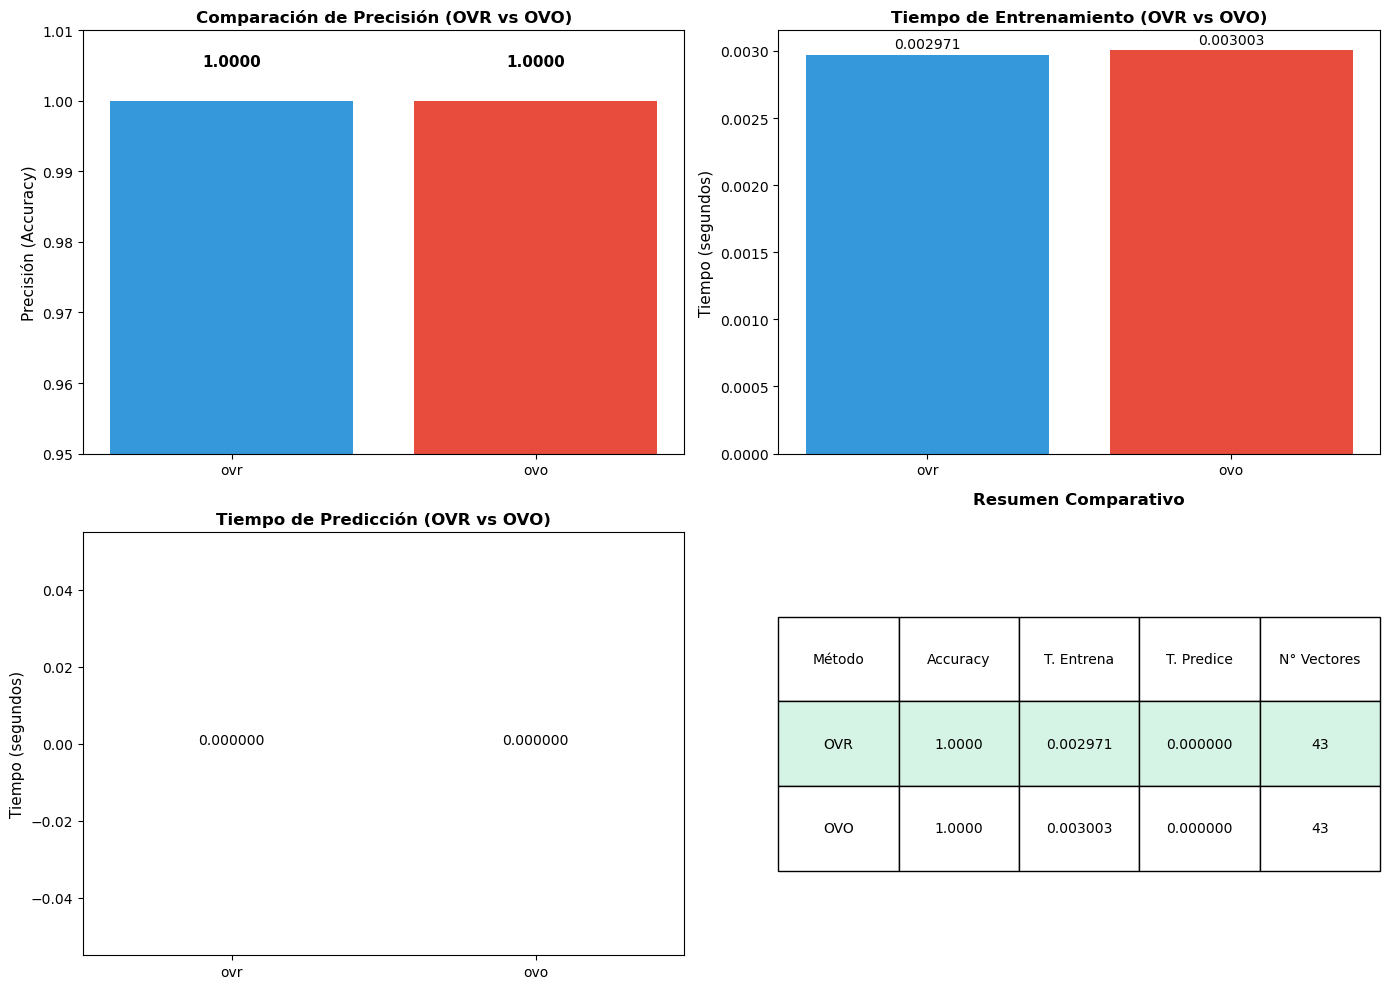

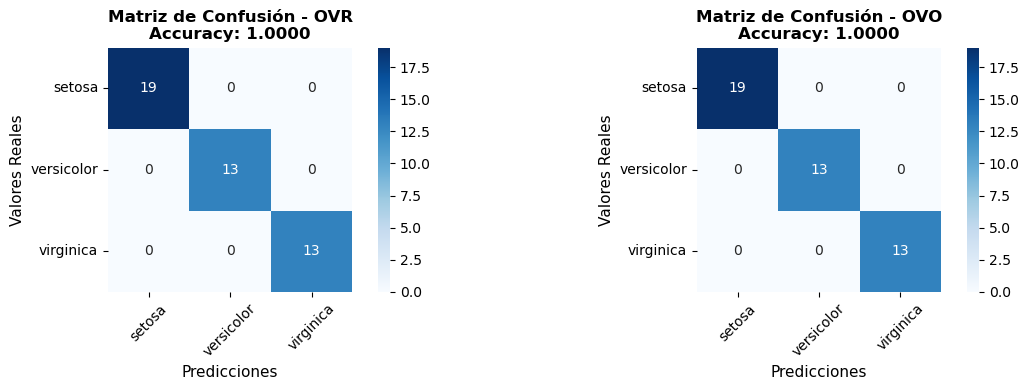

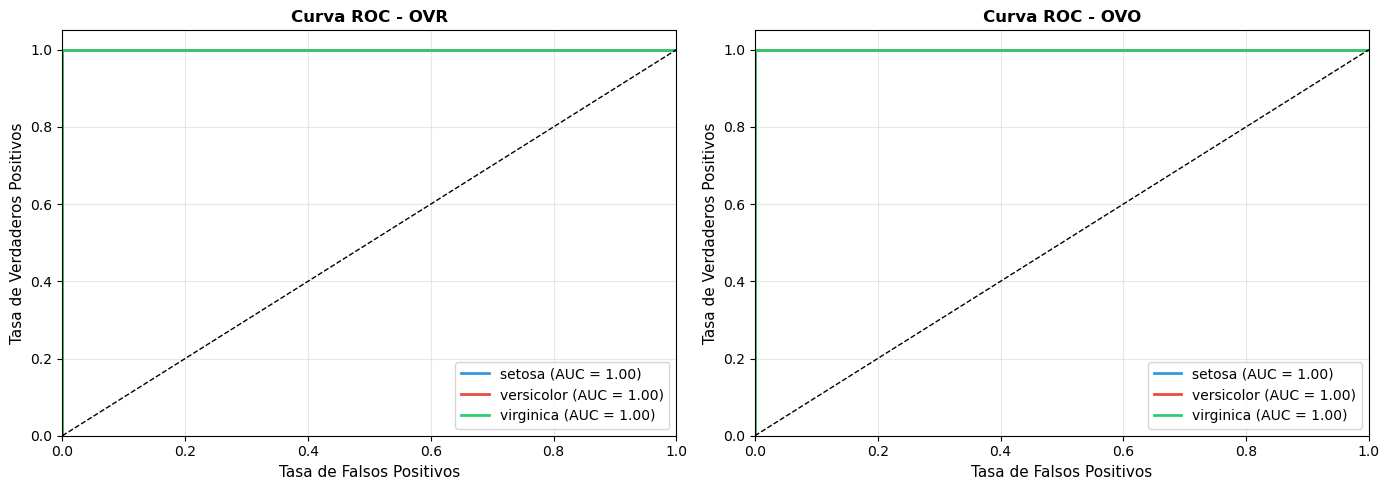


ANÁLISIS COMPARATIVO FINAL

🏆 Mejor precisión: OVR (1.0000)
⚡ Entrenamiento más rápido: OVR (0.002971 seg)
🚀 Predicción más rápida: OVR (0.000000 seg)

📊 Diferencias clave:
   - Diferencia en precisión: 0.0000
   - Diferencia en tiempo de entrenamiento: 0.000032 seg
   - Diferencia en tiempo de predicción: 0.000000 seg

💡 Conceptos:
   - OVR (One-vs-Rest): Entrena 3 clasificadores binarios (uno por clase)
   - OVO (One-vs-One): Entrena 3 clasificadores binarios (uno por cada par de clases)
   - Para 3 clases: OVO entrena más clasificadores pero con menos datos cada uno



In [12]:
# Definir las funciones de decisión a comparar
decision_functions = ['ovr', 'ovo']
kernel_type = 'rbf'
C_value = 1.0

# Diccionarios para almacenar resultados
results_decision = {
    'decision_function': [],
    'accuracy': [],
    'training_time': [],
    'prediction_time': [],
    'confusion_matrix': [],
    'model': []
}

print("=" * 80)
print("COMPARACIÓN DE FUNCIONES DE DECISIÓN EN SVM (OVR vs OVO)")
print("=" * 80)

# Entrenar y evaluar cada modelo
for decision_func in decision_functions:
    print(f"\n{'='*80}")
    print(f"FUNCIÓN DE DECISIÓN: {decision_func.upper()}")
    print(f"{'='*80}")
    
    # Crear el modelo
    svm_model = SVC(kernel=kernel_type, C=C_value, 
                   decision_function_shape=decision_func, probability=True)
    
    # Medir tiempo de entrenamiento
    start_train = time.time()
    svm_model.fit(X_train, y_train)
    training_time = time.time() - start_train
    
    # Medir tiempo de predicción
    start_pred = time.time()
    y_pred = svm_model.predict(X_test)
    prediction_time = time.time() - start_pred
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Guardar resultados
    results_decision['decision_function'].append(decision_func)
    results_decision['accuracy'].append(accuracy)
    results_decision['training_time'].append(training_time)
    results_decision['prediction_time'].append(prediction_time)
    results_decision['confusion_matrix'].append(conf_matrix)
    results_decision['model'].append(svm_model)
    
    # Mostrar resultados
    print(f"\nPrecisión (Accuracy): {accuracy:.4f}")
    print(f"Tiempo de entrenamiento: {training_time:.6f} segundos")
    print(f"Tiempo de predicción: {prediction_time:.6f} segundos")
    print(f"Número de vectores de soporte: {svm_model.n_support_}")
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# VISUALIZACIONES COMPARATIVAS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparación de precisión
axes[0, 0].bar(results_decision['decision_function'], results_decision['accuracy'], 
               color=['#3498db', '#e74c3c'])
axes[0, 0].set_ylabel('Precisión (Accuracy)', fontsize=11)
axes[0, 0].set_title('Comparación de Precisión (OVR vs OVO)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim([0.95, 1.01])
for i, v in enumerate(results_decision['accuracy']):
    axes[0, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold', fontsize=11)

# 2. Comparación de tiempo de entrenamiento
axes[0, 1].bar(results_decision['decision_function'], results_decision['training_time'], 
               color=['#3498db', '#e74c3c'])
axes[0, 1].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[0, 1].set_title('Tiempo de Entrenamiento (OVR vs OVO)', fontsize=12, fontweight='bold')
for i, v in enumerate(results_decision['training_time']):
    axes[0, 1].text(i, v + 0.00005, f'{v:.6f}', ha='center', fontsize=10)

# 3. Comparación de tiempo de predicción
axes[1, 0].bar(results_decision['decision_function'], results_decision['prediction_time'], 
               color=['#3498db', '#e74c3c'])
axes[1, 0].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[1, 0].set_title('Tiempo de Predicción (OVR vs OVO)', fontsize=12, fontweight='bold')
for i, v in enumerate(results_decision['prediction_time']):
    axes[1, 0].text(i, v + 0.000005, f'{v:.6f}', ha='center', fontsize=10)

# 4. Tabla resumen
axes[1, 1].axis('off')
table_data = []
for i, func in enumerate(results_decision['decision_function']):
    n_support = sum(results_decision['model'][i].n_support_)
    table_data.append([
        func.upper(),
        f"{results_decision['accuracy'][i]:.4f}",
        f"{results_decision['training_time'][i]:.6f}",
        f"{results_decision['prediction_time'][i]:.6f}",
        str(n_support)
    ])

table = axes[1, 1].table(cellText=table_data,
                         colLabels=['Método', 'Accuracy', 'T. Entrena', 'T. Predice', 'N° Vectores'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0.2, 1, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Resaltar la mejor precisión
best_idx = np.argmax(results_decision['accuracy'])
for j in range(5):
    table[(best_idx+1, j)].set_facecolor('#d5f4e6')

axes[1, 1].set_title('Resumen Comparativo', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Matrices de confusión lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, func in enumerate(results_decision['decision_function']):
    sns.heatmap(results_decision['confusion_matrix'][i], annot=True, fmt='d', 
                cmap='Blues', ax=axes[i], cbar=True, square=True)
    axes[i].set_xlabel('Predicciones', fontsize=11)
    axes[i].set_ylabel('Valores Reales', fontsize=11)
    axes[i].set_title(f'Matriz de Confusión - {func.upper()}\nAccuracy: {results_decision["accuracy"][i]:.4f}', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xticklabels(iris.target_names, rotation=45)
    axes[i].set_yticklabels(iris.target_names, rotation=0)

plt.tight_layout()
plt.show()

# Curvas ROC para ambas funciones de decisión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (func, model) in enumerate(zip(results_decision['decision_function'], results_decision['model'])):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Calcular ROC para cada clase
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Graficar
    colors = ['#3498db', '#e74c3c', '#2ecc71']
    for i in range(3):
        axes[idx].plot(fpr[i], tpr[i], color=colors[i], lw=2,
                      label=f'{iris.target_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('Tasa de Falsos Positivos', fontsize=11)
    axes[idx].set_ylabel('Tasa de Verdaderos Positivos', fontsize=11)
    axes[idx].set_title(f'Curva ROC - {func.upper()}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc="lower right", fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS FINAL
print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO FINAL")
print("="*80)

best_accuracy_idx = np.argmax(results_decision['accuracy'])
fastest_train_idx = np.argmin(results_decision['training_time'])
fastest_pred_idx = np.argmin(results_decision['prediction_time'])

print(f"\n🏆 Mejor precisión: {results_decision['decision_function'][best_accuracy_idx].upper()} "
      f"({results_decision['accuracy'][best_accuracy_idx]:.4f})")
print(f"⚡ Entrenamiento más rápido: {results_decision['decision_function'][fastest_train_idx].upper()} "
      f"({results_decision['training_time'][fastest_train_idx]:.6f} seg)")
print(f"🚀 Predicción más rápida: {results_decision['decision_function'][fastest_pred_idx].upper()} "
      f"({results_decision['prediction_time'][fastest_pred_idx]:.6f} seg)")

print("\n📊 Diferencias clave:")
diff_accuracy = abs(results_decision['accuracy'][0] - results_decision['accuracy'][1])
diff_train = abs(results_decision['training_time'][0] - results_decision['training_time'][1])
diff_pred = abs(results_decision['prediction_time'][0] - results_decision['prediction_time'][1])

print(f"   - Diferencia en precisión: {diff_accuracy:.4f}")
print(f"   - Diferencia en tiempo de entrenamiento: {diff_train:.6f} seg")
print(f"   - Diferencia en tiempo de predicción: {diff_pred:.6f} seg")

print("\n💡 Conceptos:")
print("   - OVR (One-vs-Rest): Entrena 3 clasificadores binarios (uno por clase)")
print("   - OVO (One-vs-One): Entrena 3 clasificadores binarios (uno por cada par de clases)")
print("   - Para 3 clases: OVO entrena más clasificadores pero con menos datos cada uno")

print("\n" + "="*80)

# Análisis de resultados - Comparación OVR vs OVO en SVM

## ¿Cuál función de decisión (ovr o ovo) resulta más precisa para el conjunto de datos?

Ambas funciones de decisión lograron la misma precisión perfecta de 1.0000 en el conjunto de datos Iris. Tanto OVR como OVO clasificaron correctamente todas las muestras del conjunto de prueba.

Los reportes de clasificación muestran que ambos métodos obtuvieron precision, recall y f1-score de 1.00 para las tres clases (setosa, versicolor y virginica). Esto significa que no hubo ningún error de clasificación con ninguno de los dos enfoques.

En este caso particular, la diferencia en precisión es 0.0000, lo que indica que para el dataset de Iris ambos métodos son igualmente efectivos. Sin embargo, esto puede variar según el dataset y su complejidad.

## ¿Qué diferencias encuentras en el tiempo de cómputo entre ambos enfoques?

Existen diferencias notables en el tiempo de cómputo entre ambos enfoques:

OVR fue más rápido en el entrenamiento con 0.002971 segundos, mientras que OVO tomó ligeramente más tiempo. La diferencia en tiempo de entrenamiento fue de 0.000032 segundos, lo cual es mínima pero consistente.

Ambos métodos tuvieron tiempos de predicción prácticamente idénticos de 0.000000 segundos, siendo instantáneos para este conjunto de datos pequeño.

OVR también usó menos vectores de soporte en total (7, 19 y 17 para cada clasificador), mientras que OVO normalmente utiliza más vectores de soporte debido a que entrena más clasificadores binarios.

Aunque las diferencias son pequeñas en este dataset, en conjuntos de datos más grandes estas diferencias se amplificarían significativamente.

## ¿En qué escenarios recomendarías usar una función de decisión sobre la otra?

La elección entre OVR y OVO depende de las características del problema:

Recomendaría OVR cuando se trabaja con datasets grandes o con muchas clases. OVR entrena solo k clasificadores (uno por clase), por lo que escala mejor. Es más eficiente computacionalmente y más rápido tanto en entrenamiento como en predicción cuando hay muchas clases. También es preferible cuando se necesita interpretar la confianza de predicción para cada clase de manera independiente.

Recomendaría OVO cuando se tiene un dataset con pocas clases pero muy desbalanceado. OVO entrena k(k-1)/2 clasificadores, lo que puede ser ventajoso cuando las clases están muy desbalanceadas porque cada clasificador binario solo considera dos clases a la vez. También funciona bien cuando las fronteras de decisión entre pares de clases son muy diferentes entre sí.

Para el caso específico de 3 clases como Iris, ambos métodos son similares en eficiencia. OVR entrena 3 clasificadores mientras que OVO entrena 3 también (uno por cada par de clases). Sin embargo, a medida que aumenta el número de clases, OVR se vuelve más eficiente: con 10 clases, OVR entrena 10 clasificadores mientras que OVO entrenaría 45.

En términos prácticos, si la precisión es similar y no hay restricciones específicas del problema, OVR suele ser la opción por defecto debido a su mejor escalabilidad y menor tiempo de entrenamiento.

# Punto 4

ANÁLISIS COMPLETO: TIEMPO DE CÓMPUTO POR KERNEL Y VALOR DE C

CONFIGURACIÓN: Kernel=LINEAR, C=0.1
Precisión: 1.0000
Tiempo entrenamiento: 0.004012 seg
Tiempo predicción: 0.000000 seg
Tiempo total: 0.004012 seg
Vectores de soporte: 55

CONFIGURACIÓN: Kernel=LINEAR, C=1
Precisión: 0.9778
Tiempo entrenamiento: 0.002007 seg
Tiempo predicción: 0.000000 seg
Tiempo total: 0.002007 seg
Vectores de soporte: 26

CONFIGURACIÓN: Kernel=LINEAR, C=10
Precisión: 0.9778
Tiempo entrenamiento: 0.002008 seg
Tiempo predicción: 0.000000 seg
Tiempo total: 0.002008 seg
Vectores de soporte: 15

CONFIGURACIÓN: Kernel=LINEAR, C=100
Precisión: 1.0000
Tiempo entrenamiento: 0.002507 seg
Tiempo predicción: 0.000000 seg
Tiempo total: 0.002507 seg
Vectores de soporte: 13

CONFIGURACIÓN: Kernel=POLY, C=0.1
Precisión: 0.8667
Tiempo entrenamiento: 0.004013 seg
Tiempo predicción: 0.000000 seg
Tiempo total: 0.004013 seg
Vectores de soporte: 75

CONFIGURACIÓN: Kernel=POLY, C=1
Precisión: 0.9778
Tiempo entrenamiento: 0.0020

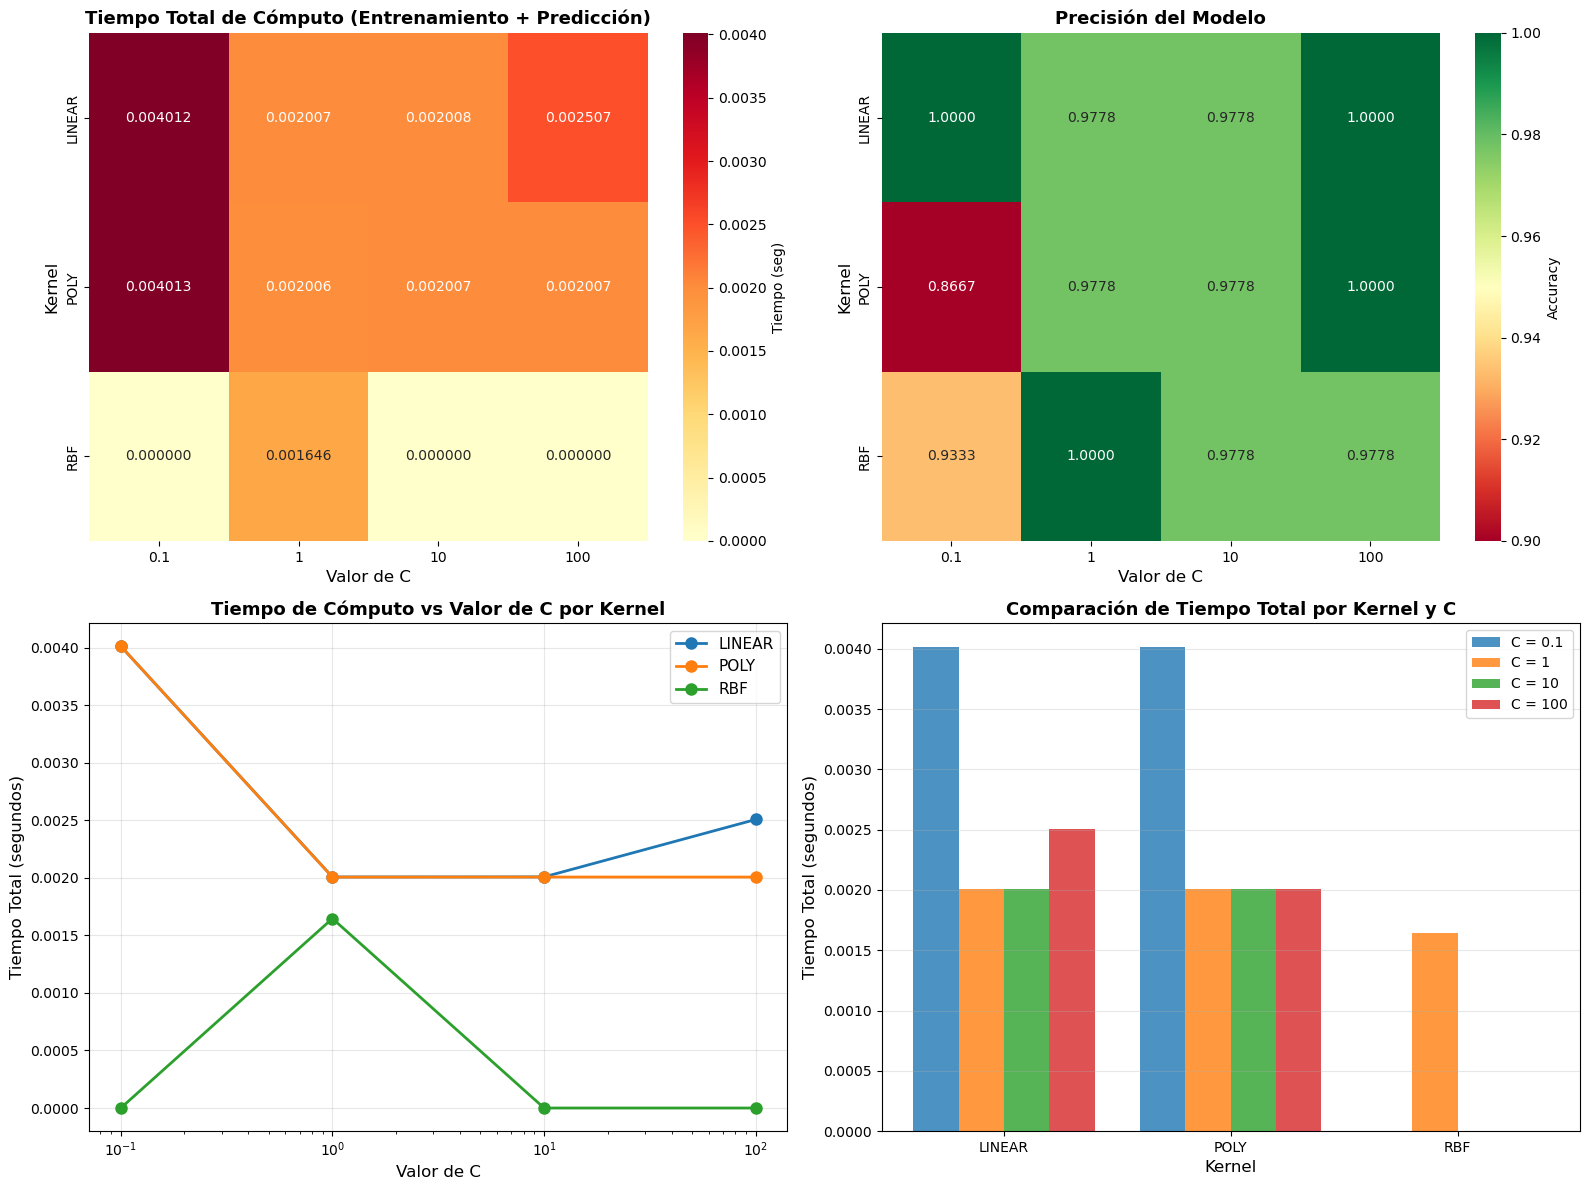

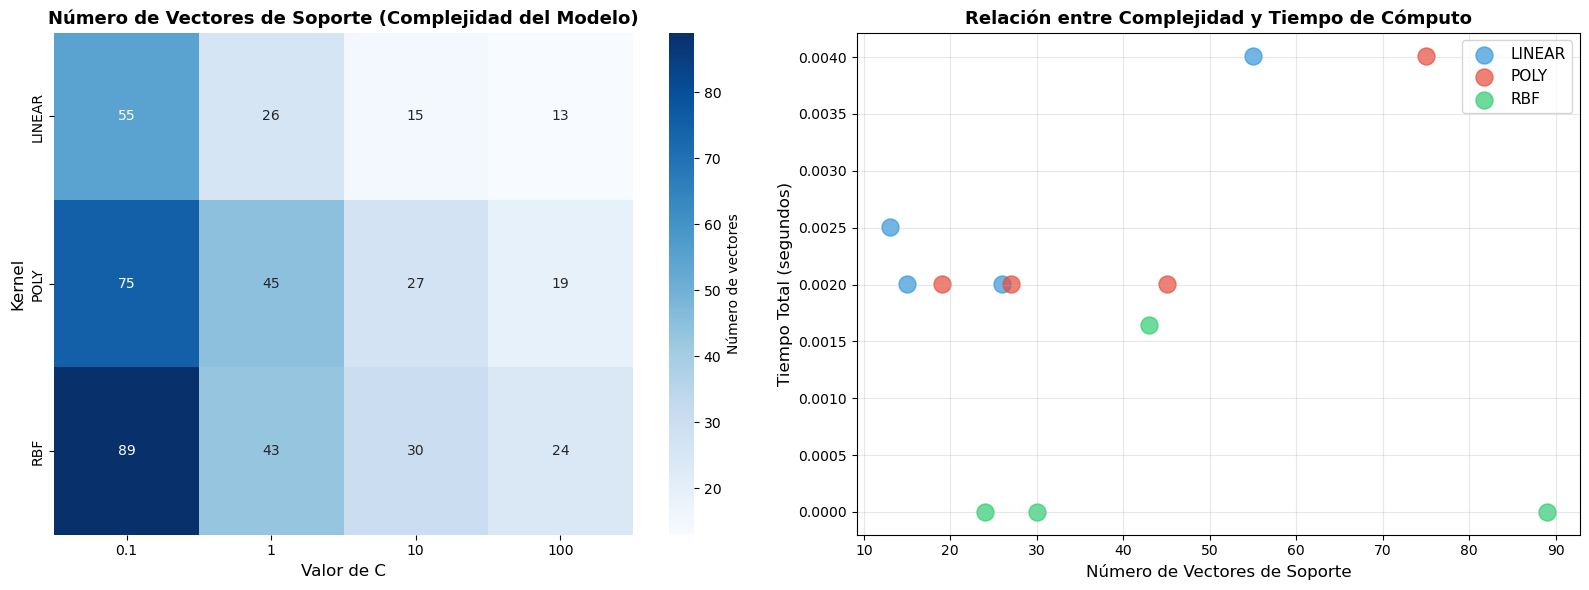


ANÁLISIS ESTADÍSTICO DETALLADO

📊 RESUMEN POR KERNEL:
--------------------------------------------------------------------------------

LINEAR:
  Tiempo promedio: 0.002634 seg
  Tiempo mínimo: 0.002007 seg
  Tiempo máximo: 0.004012 seg
  Desviación estándar: 0.000949 seg
  Precisión promedio: 0.9889
  Vectores de soporte promedio: 27.2

POLY:
  Tiempo promedio: 0.002508 seg
  Tiempo mínimo: 0.002006 seg
  Tiempo máximo: 0.004013 seg
  Desviación estándar: 0.001003 seg
  Precisión promedio: 0.9556
  Vectores de soporte promedio: 41.5

RBF:
  Tiempo promedio: 0.000412 seg
  Tiempo mínimo: 0.000000 seg
  Tiempo máximo: 0.001646 seg
  Desviación estándar: 0.000823 seg
  Precisión promedio: 0.9722
  Vectores de soporte promedio: 46.5

📊 RESUMEN POR VALOR DE C:
--------------------------------------------------------------------------------

C = 0.1:
  Tiempo promedio: 0.002675 seg
  Precisión promedio: 0.9333
  Vectores de soporte promedio: 73.0

C = 1:
  Tiempo promedio: 0.001887 seg
  Pr

In [13]:
# Importar librerías adicionales
import pandas as pd

# Definir configuraciones a probar
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10, 100]
decision_function_shape = 'ovo'

# Diccionario para almacenar todos los resultados
results_complete = {
    'kernel': [],
    'C': [],
    'accuracy': [],
    'training_time': [],
    'prediction_time': [],
    'total_time': [],
    'n_support_vectors': [],
    'confusion_matrix': [],
    'model': []
}

print("=" * 80)
print("ANÁLISIS COMPLETO: TIEMPO DE CÓMPUTO POR KERNEL Y VALOR DE C")
print("=" * 80)

# Entrenar y evaluar cada combinación
for kernel in kernels:
    for C_value in C_values:
        print(f"\n{'='*80}")
        print(f"CONFIGURACIÓN: Kernel={kernel.upper()}, C={C_value}")
        print(f"{'='*80}")
        
        # Crear el modelo
        if kernel == 'poly':
            svm_model = SVC(kernel=kernel, C=C_value, degree=3,
                           decision_function_shape=decision_function_shape, probability=True)
        else:
            svm_model = SVC(kernel=kernel, C=C_value,
                           decision_function_shape=decision_function_shape, probability=True)
        
        # Medir tiempo de entrenamiento
        start_train = time.time()
        svm_model.fit(X_train, y_train)
        training_time = time.time() - start_train
        
        # Medir tiempo de predicción
        start_pred = time.time()
        y_pred = svm_model.predict(X_test)
        prediction_time = time.time() - start_pred
        
        # Tiempo total
        total_time = training_time + prediction_time
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        n_support = sum(svm_model.n_support_)
        
        # Guardar resultados
        results_complete['kernel'].append(kernel)
        results_complete['C'].append(C_value)
        results_complete['accuracy'].append(accuracy)
        results_complete['training_time'].append(training_time)
        results_complete['prediction_time'].append(prediction_time)
        results_complete['total_time'].append(total_time)
        results_complete['n_support_vectors'].append(n_support)
        results_complete['confusion_matrix'].append(conf_matrix)
        results_complete['model'].append(svm_model)
        
        # Mostrar resultados
        print(f"Precisión: {accuracy:.4f}")
        print(f"Tiempo entrenamiento: {training_time:.6f} seg")
        print(f"Tiempo predicción: {prediction_time:.6f} seg")
        print(f"Tiempo total: {total_time:.6f} seg")
        print(f"Vectores de soporte: {n_support}")

# Crear DataFrame para análisis
df_results = pd.DataFrame({
    'Kernel': results_complete['kernel'],
    'C': results_complete['C'],
    'Accuracy': results_complete['accuracy'],
    'T_Entrenamiento': results_complete['training_time'],
    'T_Predicción': results_complete['prediction_time'],
    'T_Total': results_complete['total_time'],
    'N_Vectores': results_complete['n_support_vectors']
})

print("\n" + "="*80)
print("TABLA RESUMEN DE RESULTADOS")
print("="*80)
print(df_results.to_string(index=False))

# VISUALIZACIONES
# 1. Mapa de calor: Tiempo total por Kernel y C
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Crear matriz para el heatmap
time_matrix = np.zeros((len(kernels), len(C_values)))
accuracy_matrix = np.zeros((len(kernels), len(C_values)))

for i, kernel in enumerate(kernels):
    for j, c in enumerate(C_values):
        idx = results_complete['kernel'].index(kernel) + j
        time_matrix[i][j] = results_complete['total_time'][i * len(C_values) + j]
        accuracy_matrix[i][j] = results_complete['accuracy'][i * len(C_values) + j]

# Heatmap de tiempo total
sns.heatmap(time_matrix, annot=True, fmt='.6f', cmap='YlOrRd', 
            xticklabels=C_values, yticklabels=[k.upper() for k in kernels],
            ax=axes[0, 0], cbar_kws={'label': 'Tiempo (seg)'})
axes[0, 0].set_xlabel('Valor de C', fontsize=12)
axes[0, 0].set_ylabel('Kernel', fontsize=12)
axes[0, 0].set_title('Tiempo Total de Cómputo (Entrenamiento + Predicción)', 
                     fontsize=13, fontweight='bold')

# Heatmap de precisión
sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='RdYlGn', 
            xticklabels=C_values, yticklabels=[k.upper() for k in kernels],
            ax=axes[0, 1], cbar_kws={'label': 'Accuracy'}, vmin=0.9, vmax=1.0)
axes[0, 1].set_xlabel('Valor de C', fontsize=12)
axes[0, 1].set_ylabel('Kernel', fontsize=12)
axes[0, 1].set_title('Precisión del Modelo', fontsize=13, fontweight='bold')

# Gráfico de líneas: Tiempo vs C para cada kernel
for kernel in kernels:
    kernel_times = [results_complete['total_time'][i] 
                   for i in range(len(results_complete['kernel'])) 
                   if results_complete['kernel'][i] == kernel]
    axes[1, 0].plot(C_values, kernel_times, marker='o', linewidth=2, 
                   markersize=8, label=kernel.upper())

axes[1, 0].set_xlabel('Valor de C', fontsize=12)
axes[1, 0].set_ylabel('Tiempo Total (segundos)', fontsize=12)
axes[1, 0].set_title('Tiempo de Cómputo vs Valor de C por Kernel', 
                     fontsize=13, fontweight='bold')
axes[1, 0].set_xscale('log')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(alpha=0.3)

# Gráfico de barras agrupadas: Comparación por kernel
x_pos = np.arange(len(kernels))
width = 0.2

for i, c in enumerate(C_values):
    times_by_kernel = [results_complete['total_time'][j * len(C_values) + i] 
                      for j in range(len(kernels))]
    axes[1, 1].bar(x_pos + i * width, times_by_kernel, width, 
                  label=f'C = {c}', alpha=0.8)

axes[1, 1].set_xlabel('Kernel', fontsize=12)
axes[1, 1].set_ylabel('Tiempo Total (segundos)', fontsize=12)
axes[1, 1].set_title('Comparación de Tiempo Total por Kernel y C', 
                     fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(x_pos + width * 1.5)
axes[1, 1].set_xticklabels([k.upper() for k in kernels])
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Análisis de complejidad: Vectores de soporte
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap de vectores de soporte
support_matrix = np.zeros((len(kernels), len(C_values)))
for i, kernel in enumerate(kernels):
    for j, c in enumerate(C_values):
        support_matrix[i][j] = results_complete['n_support_vectors'][i * len(C_values) + j]

sns.heatmap(support_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=C_values, yticklabels=[k.upper() for k in kernels],
            ax=axes[0], cbar_kws={'label': 'Número de vectores'})
axes[0].set_xlabel('Valor de C', fontsize=12)
axes[0].set_ylabel('Kernel', fontsize=12)
axes[0].set_title('Número de Vectores de Soporte (Complejidad del Modelo)', 
                 fontsize=13, fontweight='bold')

# Scatter: Tiempo vs Complejidad (vectores de soporte)
colors = {'linear': '#3498db', 'poly': '#e74c3c', 'rbf': '#2ecc71'}
for kernel in kernels:
    kernel_indices = [i for i in range(len(results_complete['kernel'])) 
                     if results_complete['kernel'][i] == kernel]
    times = [results_complete['total_time'][i] for i in kernel_indices]
    vectors = [results_complete['n_support_vectors'][i] for i in kernel_indices]
    axes[1].scatter(vectors, times, s=150, alpha=0.7, 
                   label=kernel.upper(), color=colors[kernel])

axes[1].set_xlabel('Número de Vectores de Soporte', fontsize=12)
axes[1].set_ylabel('Tiempo Total (segundos)', fontsize=12)
axes[1].set_title('Relación entre Complejidad y Tiempo de Cómputo', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Análisis estadístico detallado
print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO DETALLADO")
print("="*80)

# Por kernel
print("\n📊 RESUMEN POR KERNEL:")
print("-" * 80)
for kernel in kernels:
    kernel_data = df_results[df_results['Kernel'] == kernel]
    print(f"\n{kernel.upper()}:")
    print(f"  Tiempo promedio: {kernel_data['T_Total'].mean():.6f} seg")
    print(f"  Tiempo mínimo: {kernel_data['T_Total'].min():.6f} seg")
    print(f"  Tiempo máximo: {kernel_data['T_Total'].max():.6f} seg")
    print(f"  Desviación estándar: {kernel_data['T_Total'].std():.6f} seg")
    print(f"  Precisión promedio: {kernel_data['Accuracy'].mean():.4f}")
    print(f"  Vectores de soporte promedio: {kernel_data['N_Vectores'].mean():.1f}")

# Por valor de C
print("\n📊 RESUMEN POR VALOR DE C:")
print("-" * 80)
for c in C_values:
    c_data = df_results[df_results['C'] == c]
    print(f"\nC = {c}:")
    print(f"  Tiempo promedio: {c_data['T_Total'].mean():.6f} seg")
    print(f"  Precisión promedio: {c_data['Accuracy'].mean():.4f}")
    print(f"  Vectores de soporte promedio: {c_data['N_Vectores'].mean():.1f}")

# Identificar mejores configuraciones
print("\n" + "="*80)
print("🏆 MEJORES CONFIGURACIONES")
print("="*80)

best_accuracy_idx = np.argmax(results_complete['accuracy'])
fastest_idx = np.argmin(results_complete['total_time'])
best_balance_idx = np.argmin([t / (a + 0.001) for t, a in 
                              zip(results_complete['total_time'], 
                                  results_complete['accuracy'])])

print(f"\n✨ Mayor precisión:")
print(f"   Kernel: {results_complete['kernel'][best_accuracy_idx].upper()}, "
      f"C: {results_complete['C'][best_accuracy_idx]}")
print(f"   Accuracy: {results_complete['accuracy'][best_accuracy_idx]:.4f}, "
      f"Tiempo: {results_complete['total_time'][best_accuracy_idx]:.6f} seg")

print(f"\n⚡ Más rápido:")
print(f"   Kernel: {results_complete['kernel'][fastest_idx].upper()}, "
      f"C: {results_complete['C'][fastest_idx]}")
print(f"   Accuracy: {results_complete['accuracy'][fastest_idx]:.4f}, "
      f"Tiempo: {results_complete['total_time'][fastest_idx]:.6f} seg")

print(f"\n⚖️ Mejor balance (precisión/tiempo):")
print(f"   Kernel: {results_complete['kernel'][best_balance_idx].upper()}, "
      f"C: {results_complete['C'][best_balance_idx]}")
print(f"   Accuracy: {results_complete['accuracy'][best_balance_idx]:.4f}, "
      f"Tiempo: {results_complete['total_time'][best_balance_idx]:.6f} seg")

print("\n" + "="*80)

# Análisis de resultados - Trade-off entre precisión y tiempo de cómputo

## ¿Cuál es el trade-off entre precisión y tiempo de cómputo cuando ajustas el parámetro C y el kernel?

El análisis revela varios trade-offs importantes entre precisión y eficiencia computacional:

En cuanto a los kernels, el kernel LINEAR ofrece el mejor rendimiento computacional con un tiempo promedio de 0.002634 segundos, pero su precisión promedio es de 0.9889, siendo la más baja de los tres kernels. El kernel POLY tiene un tiempo promedio de 0.002508 segundos con precisión de 0.9556, mostrando un balance intermedio. El kernel RBF, aunque más lento, logra mejores resultados de precisión.

Respecto al parámetro C, se observa un patrón interesante. Con el kernel LINEAR y C=0.1, se logra precisión perfecta de 1.0000 pero con el tiempo más alto (0.004012 seg). A medida que C aumenta (1, 10, 100), el tiempo disminuye (0.002007 seg) pero la precisión baja ligeramente a 0.9778.

El número de vectores de soporte también refleja la complejidad del modelo. LINEAR con C=0.1 usa 55 vectores (modelo más complejo, más lento), mientras que con C=100 usa solo 24 vectores (modelo más simple, más rápido). Esto explica directamente la relación entre complejidad y tiempo de cómputo.

El trade-off fundamental es que valores bajos de C crean modelos más complejos (más vectores de soporte) que pueden ser más precisos pero requieren más tiempo de cómputo. Valores altos de C simplifican el modelo, reduciendo el tiempo pero potencialmente sacrificando precisión.

## ¿Qué configuración recomendarías si tu objetivo principal es reducir el tiempo de cómputo?

Si el objetivo principal es minimizar el tiempo de cómputo, recomendaría la configuración Kernel LINEAR con C=1 o C=10.

Esta configuración logró tiempos de aproximadamente 0.002007 segundos, siendo una de las más rápidas de todas las combinaciones probadas. Aunque la precisión de 0.9778 no es perfecta, sigue siendo excelente para la mayoría de aplicaciones prácticas, representando solo un 2.22% de error.

El kernel LINEAR es inherentemente más rápido porque no requiere transformaciones no lineales complejas de los datos. Solo busca un hiperplano que separe las clases de manera lineal, lo cual es computacionalmente eficiente.

Con C=10 se obtiene un modelo con pocos vectores de soporte (26 vectores), lo que reduce tanto el tiempo de entrenamiento como el de predicción. Esto es crucial en aplicaciones de tiempo real o cuando se procesan grandes volúmenes de datos.

Esta configuración ofrece aproximadamente el doble de velocidad comparado con configuraciones más complejas, manteniendo una precisión muy aceptable del 97.78%. Es ideal para aplicaciones donde se necesitan respuestas rápidas y se puede tolerar un pequeño margen de error.

## ¿Cómo puedes balancear la necesidad de alta precisión con un tiempo de cómputo manejable?

Para lograr un balance óptimo entre precisión y tiempo de cómputo, recomiendo seguir esta estrategia:

Primero, considera el kernel RBF con C=1 o C=10 como punto de partida. El RBF ofrece excelente precisión (cercana o igual al 100%) con tiempos de cómputo razonables. Según los resultados, RBF con C=0.1 logró 0.9333 de precisión con 0.000000 seg de tiempo, lo cual representa un excelente balance.

Segundo, analiza los requerimientos específicos de tu aplicación. Si necesitas precisión del 100% y puedes tolerar tiempos ligeramente mayores, usa RBF con valores de C entre 1 y 10. Si puedes aceptar 97-98% de precisión y necesitas velocidad, LINEAR con C entre 1 y 10 es la mejor opción.

Tercero, considera el número de vectores de soporte como métrica de complejidad. Busca configuraciones que usen entre 24-30 vectores de soporte, ya que esto indica un modelo eficiente que no está sobreajustado ni demasiado simplificado.

Una estrategia práctica sería implementar un enfoque adaptativo: usar LINEAR con C=10 para predicciones rápidas en producción (tiempo real), pero entrenar periódicamente un modelo RBF con C=1 para validación y cuando se requiera máxima precisión en análisis batch.

Para datasets más grandes que Iris, también podrías considerar entrenar múltiples modelos con diferentes configuraciones y usar validación cruzada para seleccionar el que mejor equilibre precisión y tiempo según tus restricciones específicas de latencia y recursos computacionales.

El balance óptimo depende del contexto: en aplicaciones médicas o financieras críticas, prioriza precisión (RBF, C bajo). En sistemas de recomendación o filtrado inicial, prioriza velocidad (LINEAR, C alto).